Machine Learning model to anticipate and classify the severity of any airplane accident based on past incidents. 

# IMPORTING ALL THE LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# READING THE DATASET

In [2]:
data = pd.read_csv('AirplaneAccident.csv')
train = pd.read_csv('AirplaneAccident.csv')


In [3]:
data.head()       # to view the labels of possible cases of Severity. 

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [4]:
data.describe().T            # to get average stats. The property T is an accessor to the method transpose().

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636910,32060.336420,38380.641515,64297.651220
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


In [5]:
data.corr()      #Computes pairwise correlation of columns, excluding NA/null values

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,1.000000,-0.685386,0.057726,0.000564,0.019603,0.032747,0.173930,0.004451,0.041735,-0.107925,-0.001334
Days_Since_Inspection,-0.685386,1.000000,-0.032055,-0.011963,-0.001564,-0.039140,-0.024718,0.000183,-0.016724,0.040804,0.000582
Total_Safety_Complaints,0.057726,-0.032055,1.000000,-0.019665,0.066412,0.013590,0.034927,0.036855,-0.019005,-0.002713,0.004527
Control_Metric,0.000564,-0.011963,-0.019665,1.000000,-0.643285,-0.008330,0.008385,-0.028375,-0.003284,-0.028296,0.006481
Turbulence_In_gforces,0.019603,-0.001564,0.066412,-0.643285,1.000000,0.010757,-0.007565,0.047625,0.013171,0.039802,-0.014396
Cabin_Temperature,0.032747,-0.039140,0.013590,-0.008330,0.010757,1.000000,0.030682,-0.009186,0.018619,-0.026647,0.014865
Accident_Type_Code,0.173930,-0.024718,0.034927,0.008385,-0.007565,0.030682,1.000000,0.019970,0.046379,-0.739361,-0.012278
Max_Elevation,0.004451,0.000183,0.036855,-0.028375,0.047625,-0.009186,0.019970,1.000000,-0.030513,0.173436,0.008576
Violations,0.041735,-0.016724,-0.019005,-0.003284,0.013171,0.018619,0.046379,-0.030513,1.000000,-0.021578,-0.002047
Adverse_Weather_Metric,-0.107925,0.040804,-0.002713,-0.028296,0.039802,-0.026647,-0.739361,0.173436,-0.021578,1.000000,0.008586


In [6]:
data.isnull().any()           # checking for any null value

Severity                   False
Safety_Score               False
Days_Since_Inspection      False
Total_Safety_Complaints    False
Control_Metric             False
Turbulence_In_gforces      False
Cabin_Temperature          False
Accident_Type_Code         False
Max_Elevation              False
Violations                 False
Adverse_Weather_Metric     False
Accident_ID                False
dtype: bool

In [7]:
data.tail()         # returning last rows (of dataset)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.36341,2,0.026150,11493
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.91690,2,0.074898,305
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.99630,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.41925,2,0.026381,4963
9999,Highly_Fatal_And_Damaging,50.000000,13,3,45.487694,0.382467,77.46,5,26005.32299,2,0.017036,9387


CHECKING WHETHER THE ACCIDENT TYPE CODE AND VIOLATIONS ARE CATEGORICAL

In [8]:
for i in data.keys():
    length = len(data[i].unique().tolist())
    if(length<10):
        print(i)

Severity
Accident_Type_Code
Violations


In [9]:
data['Accident_Type_Code'].unique()         #Getting all unique values from that column

array([2, 7, 3, 4, 1, 6, 5], dtype=int64)

In [10]:
data['Violations'].unique()

array([3, 2, 1, 0, 4, 5], dtype=int64)

# VISUALIZING THE DATA

ANALYZING THE CLASS LABELS

In [11]:
class_label = data['Severity'].value_counts()
total_points = len(data)
print("Points with class label -> 'Highly fatal and damaging' are = ",class_label.values[0]/total_points*
100,"%")
print("Points with class label -> 'Significant damage and serious injuries' are = ",class_label.values[1]/total_points*
100,"%")
print("Points with class label -> 'Minor damage and injuries' are = ",class_label.values[2]/total_points*
100,"%")
print("Points with class label -> 'Significant damage and fatalities' are = ",class_label.values[3]/total_points*
100,"%")
labels = ['Highly fatal and damaging','Significant damage and serious injuries','Minor damage and injuries','Significant damage and fatalities']


Points with class label -> 'Highly fatal and damaging' are =  30.490000000000002 %
Points with class label -> 'Significant damage and serious injuries' are =  27.29 %
Points with class label -> 'Minor damage and injuries' are =  25.27 %
Points with class label -> 'Significant damage and fatalities' are =  16.950000000000003 %


### NOW, PLOTTING A PIE CHART FOR THE 4 LABELS OF SEVERITY

([<matplotlib.patches.Wedge at 0x1d50e3607c8>,
 [Text(0.6327885049635631, 0.8997659184398901, 'Highly fatal and damaging'),
  Text(-1.0261520927877268, 0.39624724916063275, 'Significant damage and serious injuries'),
  Text(-0.31252728464569235, -1.0546689984786652, 'Minor damage and injuries'),
  Text(0.9476946595353, -0.5584575474360357, 'Significant damage and fatalities')],
 [Text(0.34515736634376165, 0.4907814100581218, '30.5%'),
  Text(-0.5597193233387601, 0.21613486317852693, '27.3%'),
  Text(-0.17046942798855946, -0.575273999170181, '25.3%'),
  Text(0.5169243597465272, -0.30461320769238304, '17.0%')])

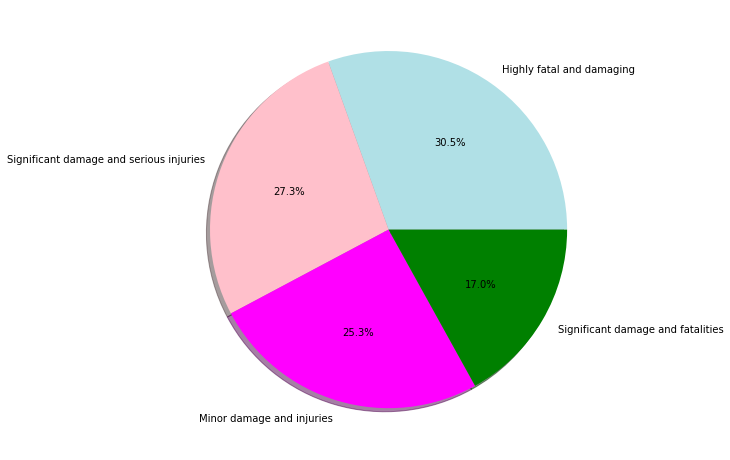

In [12]:
sizes = [30.490000000000002,27.29,25.27,16.950000000000003]
colors = ['powderblue', 'pink','magenta','green']
plt.figure(figsize=(8,10))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

In [13]:
label = train['Severity']
label.tail()        # returning last rows (on basis of Severity)

9995    Significant_Damage_And_Serious_Injuries
9996                  Highly_Fatal_And_Damaging
9997    Significant_Damage_And_Serious_Injuries
9998                  Minor_Damage_And_Injuries
9999                  Highly_Fatal_And_Damaging
Name: Severity, dtype: object

# FEATURE ENGINEERING

In [14]:
data.keys()

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [15]:
for i in label.unique().tolist():
    print(i)

Minor_Damage_And_Injuries
Significant_Damage_And_Fatalities
Significant_Damage_And_Serious_Injuries
Highly_Fatal_And_Damaging


In [16]:
label.head()

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object

In [17]:
label = {'Severity': label}

In [18]:
label = pd.DataFrame(label)

In [19]:
label.head()

,Severity
0,Minor_Damage_And_Injuries
1,Minor_Damage_And_Injuries
2,Significant_Damage_And_Fatalities
3,Significant_Damage_And_Serious_Injuries
4,Significant_Damage_And_Fatalities


# PLOTTING CLASS LABELS WRT SEVERITY ( I HAVE USED VARIOUS PLOTS TO MAKE IT LOOK INTERESTING )

### ANALYSING SAFETY SCORE

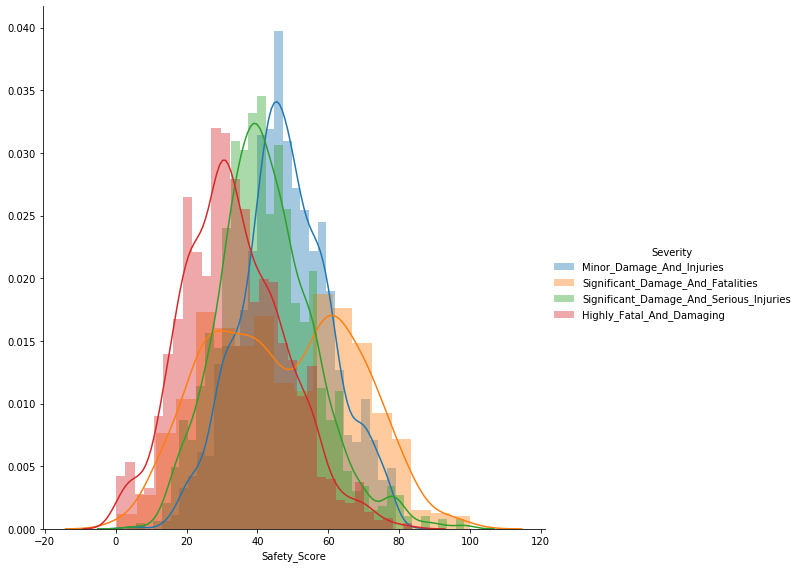

In [20]:
sns.FacetGrid(data, hue="Severity",height=8).map(sns.distplot, "Safety_Score").add_legend()

The values of safety score seem to follow a gaussian distribution for all class labels except 'Significant damage and fatalities'

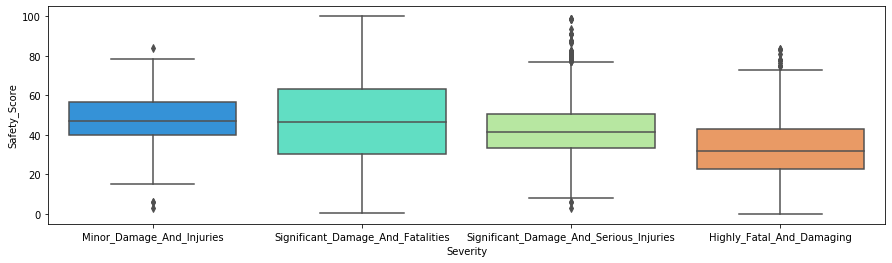

In [21]:
plt.figure(figsize=(15,4))
sns.boxplot(data=data,x = 'Severity', y = 'Safety_Score',palette = 'rainbow') 

### FURTHER ANALYSING DATA ON BASIS OF DAYS SINCE INSPECTION

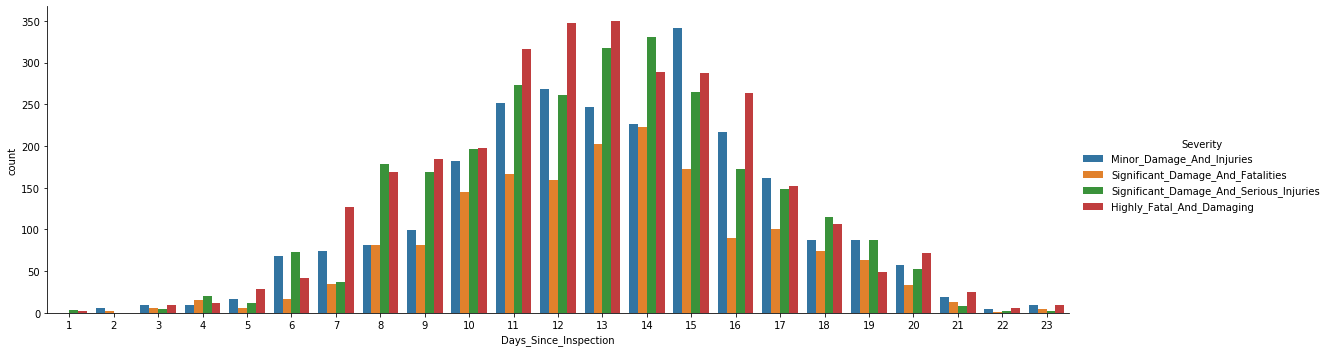

In [22]:
sns.catplot(x="Days_Since_Inspection",hue="Severity", kind="count", data=data,aspect=3)

### ANALYSING TOTAL SAFETY COMPLAINTS

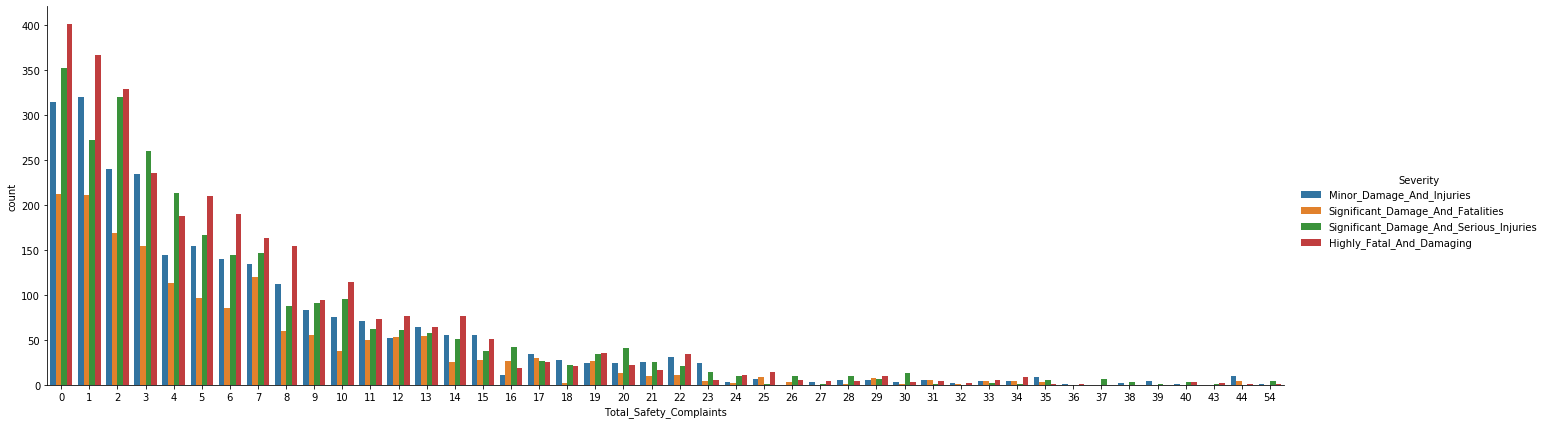

In [23]:
sns.catplot(x="Total_Safety_Complaints",hue="Severity", kind="count", data=data,aspect=3,height=6)

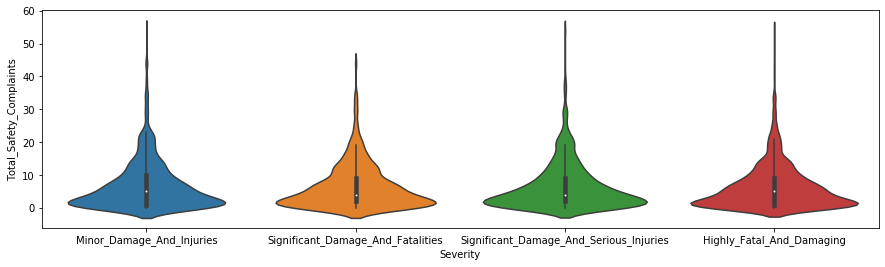

In [24]:
plt.figure(figsize=(15,4))
sns.violinplot(data=data,x = 'Severity', y = 'Total_Safety_Complaints') 

### ANALYSING CONTROL METRIC

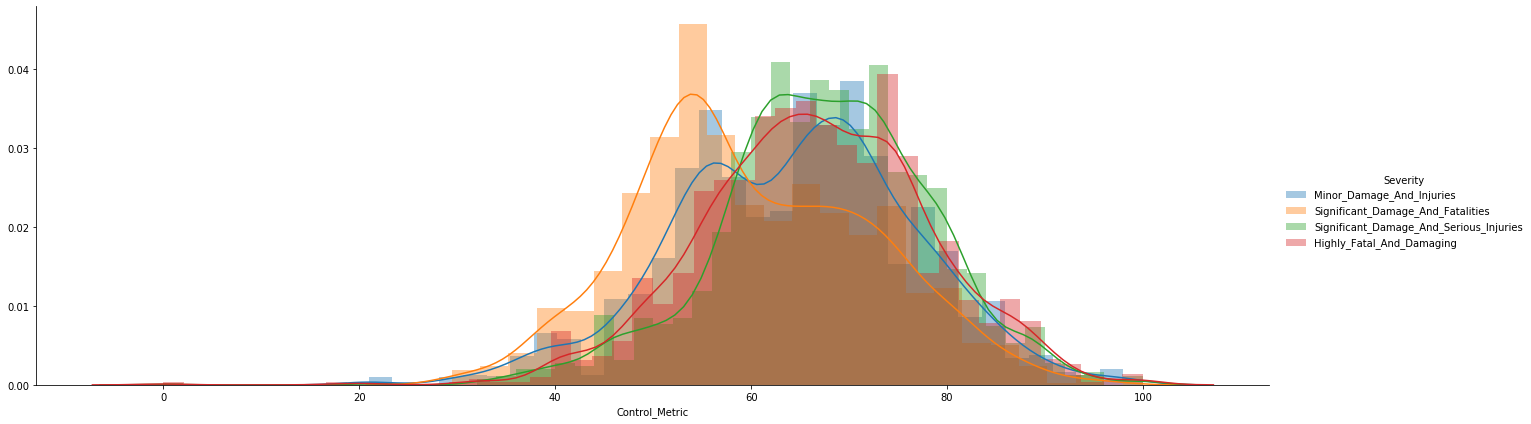

In [25]:
sns.FacetGrid(data, hue="Severity",height=6,aspect=3).map(sns.distplot, "Control_Metric").add_legend()

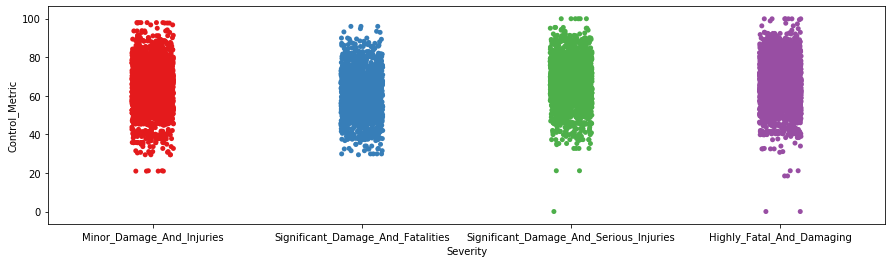

In [26]:
plt.figure(figsize=(15,4))
sns.stripplot(data=data,x = 'Severity', y = 'Control_Metric', palette='Set1')

### ANALYSING TURBULENCE IN GFORCES

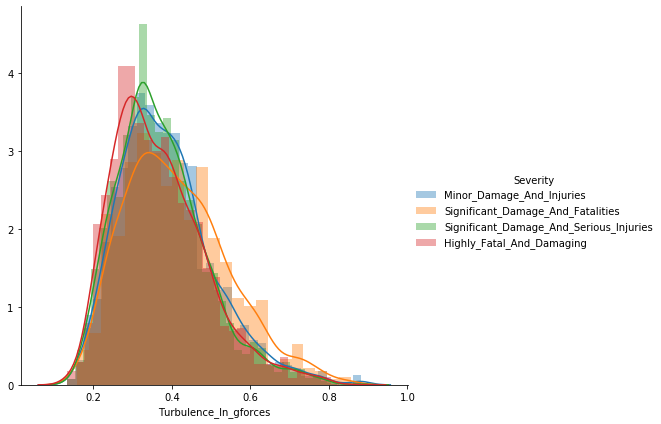

In [27]:
sns.FacetGrid(data, hue="Severity",height=6).map(sns.distplot, "Turbulence_In_gforces").add_legend()

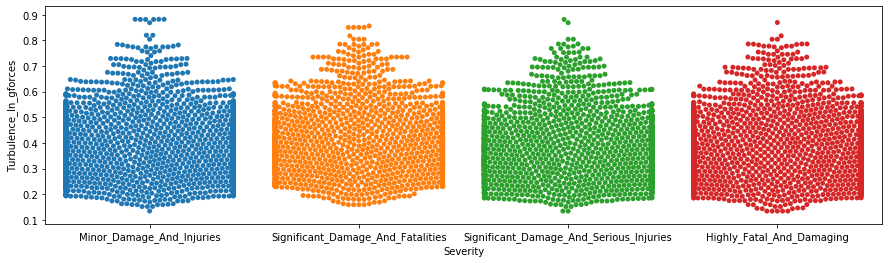

In [28]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=data,x = 'Severity', y = 'Turbulence_In_gforces')

### ANALYSING CABIN TEMPARATURE

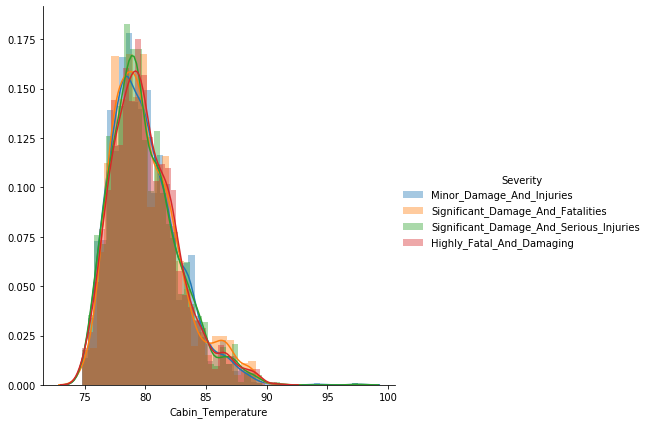

In [29]:
sns.FacetGrid(data, hue="Severity",height=6).map(sns.distplot, "Cabin_Temperature").add_legend()

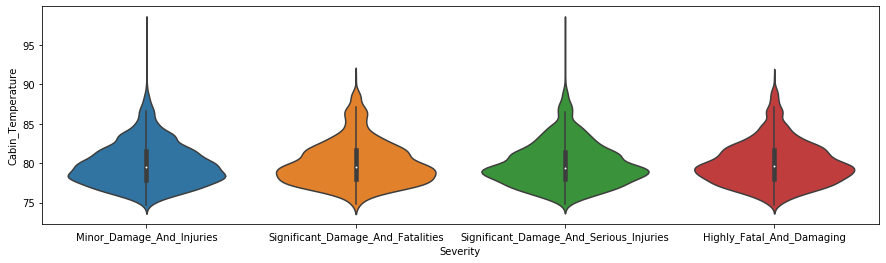

In [30]:
plt.figure(figsize=(15,4))
sns.violinplot(data=data,x = 'Severity', y = 'Cabin_Temperature')

### ANALYSING THE ACCIDENT TYPE CODE

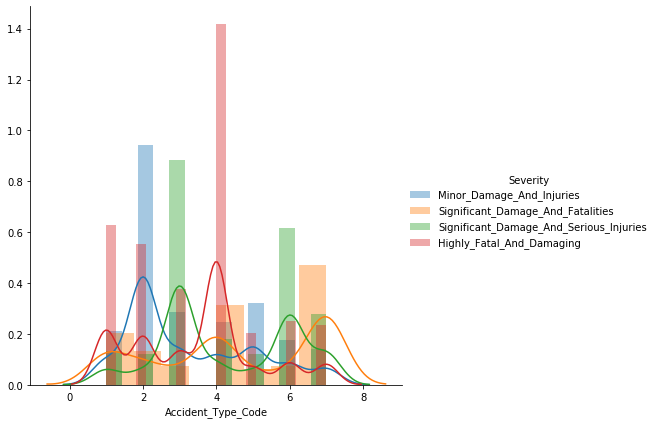

In [31]:
sns.FacetGrid(data, hue="Severity",height=6).map(sns.distplot, "Accident_Type_Code").add_legend()

### Since, the distplot is not uniform, we use another plotting method say, countplot

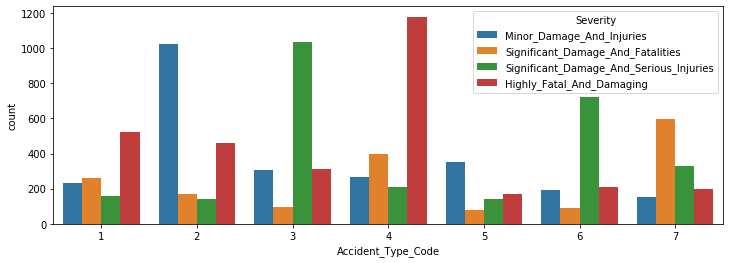

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x="Accident_Type_Code",hue="Severity", data=data)

### ANALYSING MAX ELEVATION

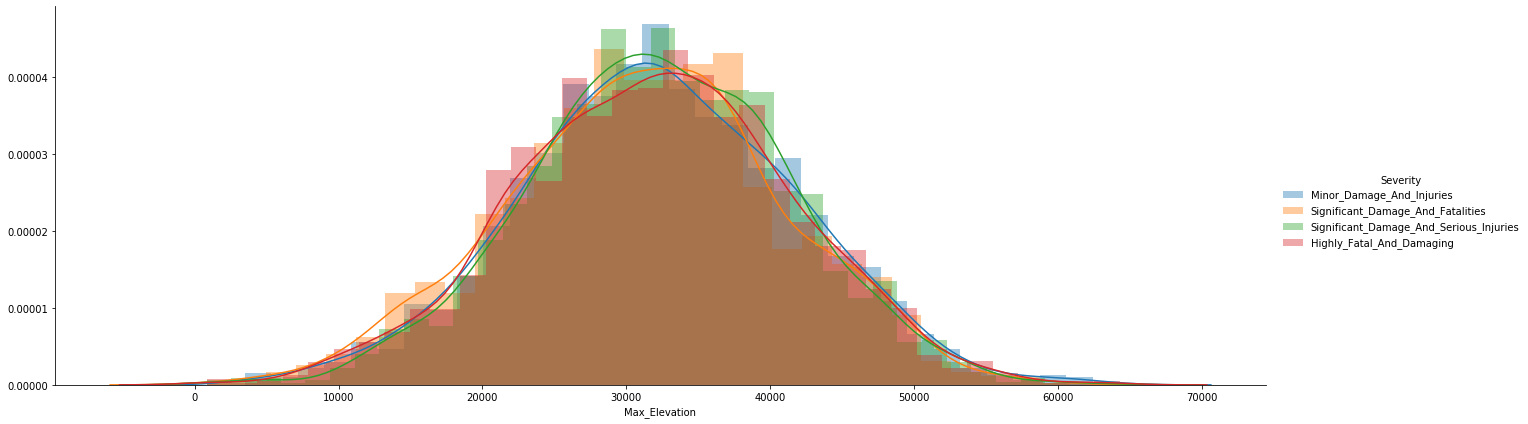

In [33]:
sns.FacetGrid(data, hue="Severity",height=6,aspect=3).map(sns.distplot, "Max_Elevation").add_legend()

### ANALYSING THE VIOLATIONS

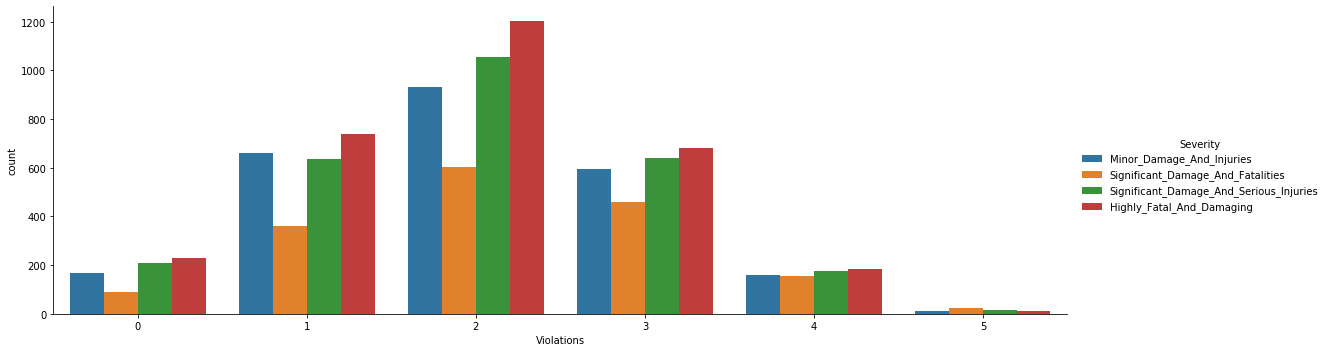

In [34]:
sns.catplot(x="Violations",hue="Severity", kind="count", data=data,aspect=3)

### ANALYSING THE ADVERSE WEATHER METRIC

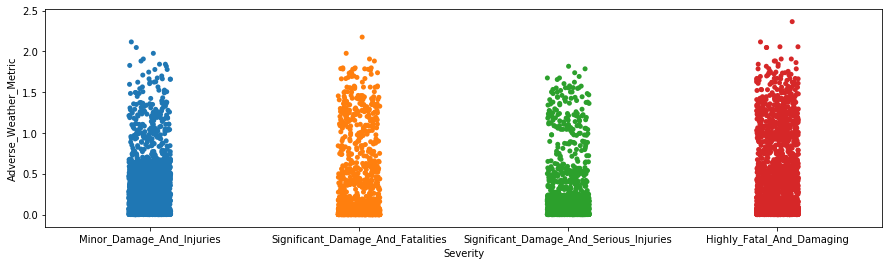

In [35]:
plt.figure(figsize=(15,4))
sns.stripplot(y="Adverse_Weather_Metric",x="Severity", data=data)

## NOW, FOR BETTER VISUALISATION, LET'S COMPARE 2 CLASS LABELS AT A TIME WRT OUTPUT LABEL AS SEVERITY

### Total safety complaints vs Days since inspection

<Figure size 1080x1080 with 0 Axes>

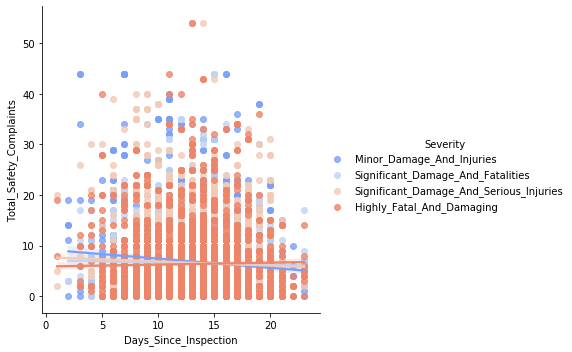

In [36]:
plt.figure(figsize=(15,15))
sns.lmplot(x="Days_Since_Inspection",y="Total_Safety_Complaints",hue="Severity", data=data, aspect=1, palette='coolwarm') # used regression plot

### Max elevation vs safety score

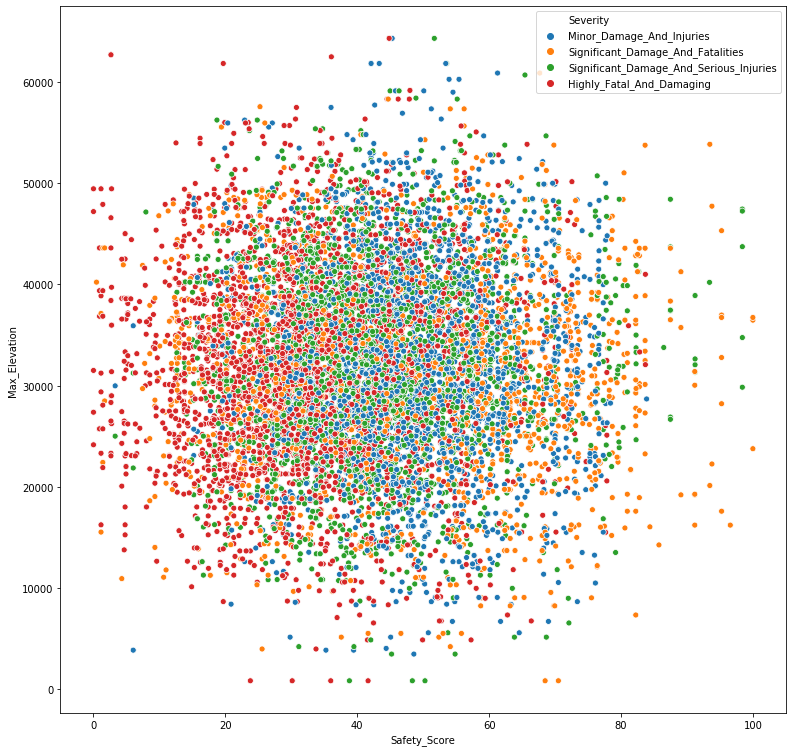

In [37]:
plt.figure(figsize=(13,13))
sns.scatterplot(x="Safety_Score", y="Max_Elevation", hue="Severity",data=data)

### Turbulence vs control metric

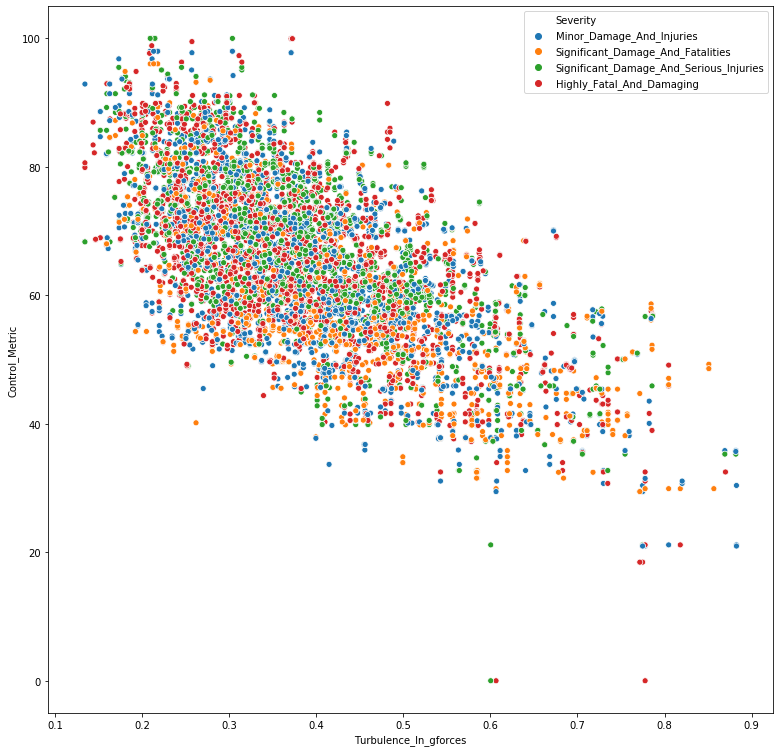

In [38]:
plt.figure(figsize=(13,13))
sns.scatterplot(x="Turbulence_In_gforces", y="Control_Metric", hue="Severity",data=data)

#### In this way, we can plot every pair of data

## UNIVARIATE ANALYSIS

### Training a model(eg: Logistic Regression) with a single feature 

In [39]:
#Dividing the training data into train,test sets

x_train, x_test, y_train, y_test = train_test_split(data.drop(['Severity','Accident_ID'],axis=1), 
                                                    data['Severity'], test_size=0.30, 
                                                    random_state=101)

In [40]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

### Now predict values for the testing data

In [41]:
predictions = logmodel.predict(x_test)

### Creating a classification report for the model.

In [42]:
print(classification_report(y_test,predictions))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.47      0.68      0.56       906
              Minor_Damage_And_Injuries       0.36      0.38      0.37       762
      Significant_Damage_And_Fatalities       0.22      0.06      0.09       502
Significant_Damage_And_Serious_Injuries       0.39      0.36      0.38       830

                               accuracy                           0.41      3000
                              macro avg       0.36      0.37      0.35      3000
                           weighted avg       0.38      0.41      0.38      3000



### ANALYSING CORRELATION MATRIX OF THE DATA

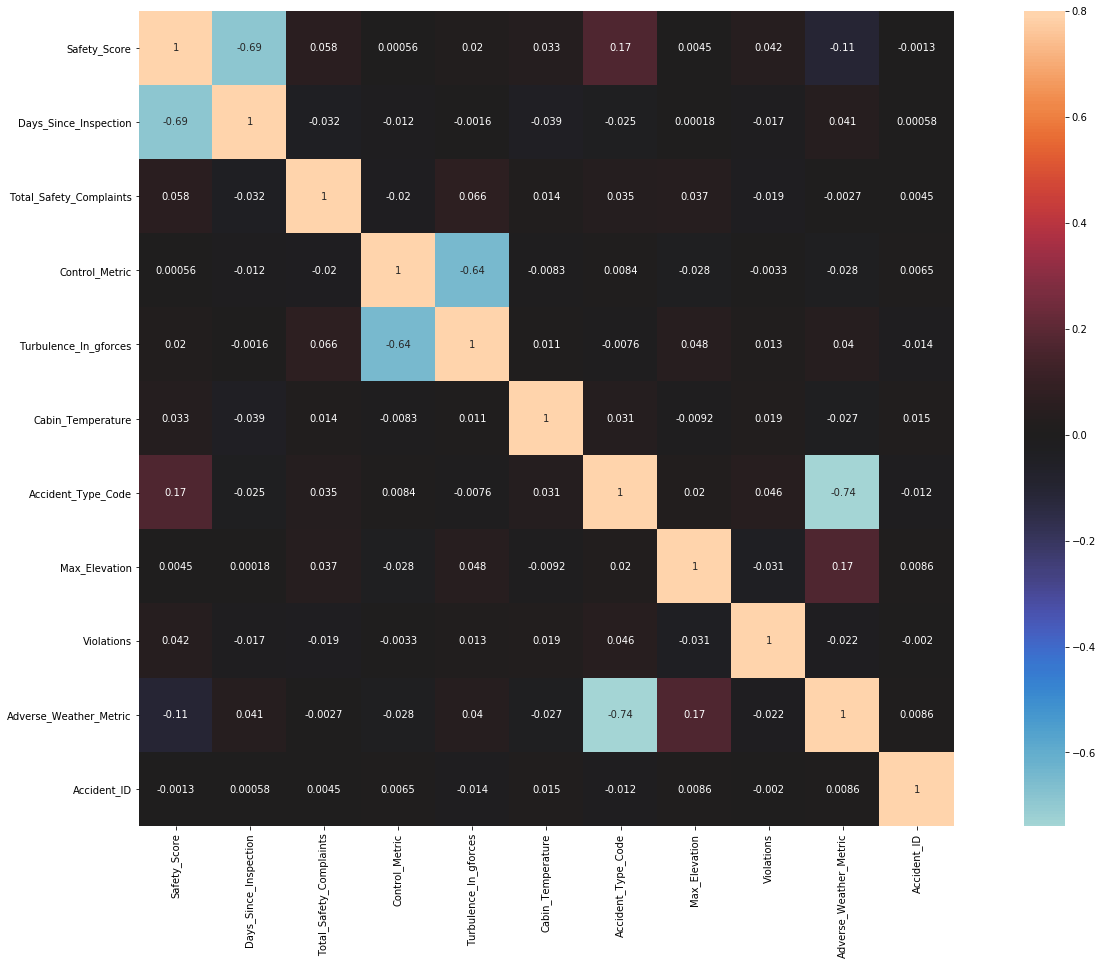

In [43]:
corrmat=data.corr()
fig=plt.figure(figsize=(25,15))
sns.heatmap(corrmat,center=0,vmax=.8,square=True,annot=True)
plt.show()

##### We can see that there exists negative correlation, which induces multi-colinearity(i.e two or more explanatory variables in a multiple regression model are highly linearly related) . So to avoid the effect of multi-colinearity in accuracy of Classification model, Decision Tree Classifier Algorithm is better in building the model

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
predictions = dtree.predict(x_test)

In [46]:
print(confusion_matrix(y_test,predictions))

[[850  22  11  23]
 [ 26 694  15  27]
 [ 19  13 457  13]
 [ 24  25   3 778]]


In [47]:
print(classification_report(y_test,predictions))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.92      0.94      0.93       906
              Minor_Damage_And_Injuries       0.92      0.91      0.92       762
      Significant_Damage_And_Fatalities       0.94      0.91      0.93       502
Significant_Damage_And_Serious_Injuries       0.93      0.94      0.93       830

                               accuracy                           0.93      3000
                              macro avg       0.93      0.92      0.93      3000
                           weighted avg       0.93      0.93      0.93      3000



In [48]:
# Find the class distrubtion
train.groupby(['Severity']).count()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Severity,,,,,,,,,,,
Highly_Fatal_And_Damaging,3049,3049,3049,3049,3049,3049,3049,3049,3049,3049,3049
Minor_Damage_And_Injuries,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527
Significant_Damage_And_Fatalities,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695
Significant_Damage_And_Serious_Injuries,2729,2729,2729,2729,2729,2729,2729,2729,2729,2729,2729


#### We can also remove negative correlation with Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rfc_pred = rfc.predict(x_test)

In [51]:
print(confusion_matrix(y_test,rfc_pred))

[[837  36  13  20]
 [ 12 713  12  25]
 [  7  29 450  16]
 [ 24  39   4 763]]


In [52]:
print(classification_report(y_test,rfc_pred))             # Classification report for the model

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.92      0.94       906
              Minor_Damage_And_Injuries       0.87      0.94      0.90       762
      Significant_Damage_And_Fatalities       0.94      0.90      0.92       502
Significant_Damage_And_Serious_Injuries       0.93      0.92      0.92       830

                               accuracy                           0.92      3000
                              macro avg       0.92      0.92      0.92      3000
                           weighted avg       0.92      0.92      0.92      3000



#### We can se that after removing negative correlation, we get much better results